In [1]:
from jwst_wcs_align import jwst_wcs_align
from jwst.datamodels import ImageModel
import re,os
from jwst_wcs_align import initplot, rotate_d_and_find_binmax, sigmacut_d_rot, infoplots
import matplotlib.pyplot as plt

#input_image='/ifs/jwst/wit/nircam/commissioning/01069/obsnum2/jw01069002004_06101_00002_nrcb3_cal.fits'
#distortion_file = '/Users/arest/nircam/jwst_distortions_tools/final_CRDS/v1.2/nrcb3_full_f200w_clear.distcoeff.asdf'
#input_image='/ifs/jwst/wit/nircam/commissioning/01069/obsnum2/jw01069002002_02101_00002_nrca1_cal.fits'
#distortion_file = '/Users/arest/nircam/jwst_distortions_tools/final_CRDS/v1.2/nrca1_full_f070w_clear.distcoeff.asdf'
input_image='/ifs/jwst/wit/nircam/commissioning/01074/obsnum3/jw01074003001_04101_00002_nrcb3_cal.fits'
distortion_file = '/Users/arest/nircam/jwst_distortions_tools/final_CRDS/v1.2/nrcb3_full_f150w_clear.distcoeff.asdf'

outrootdir = '/Users/arest/nircam/jwst_distortions_tools'
outsubdir = 'wcs_align/test_newrefcats'
wcs_align = jwst_wcs_align()
verbose=2
wcs_align.verbose=verbose
wcs_align.set_outdir(outrootdir, outsubdir)
### get someinfo
image_model = ImageModel(input_image)
print(f'Info: outdir:{wcs_align.outdir}\n{os.path.basename(input_image)}: {image_model.meta.aperture.name} {image_model.meta.instrument.filter} {image_model.meta.instrument.pupil}')

Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Info: outdir:/Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats
jw01074003001_04101_00002_nrcb3_cal.fits: NRCB3_FULL F210M CLEAR


In [2]:
overwrite = True
skip_applydistortions_if_exists=False
skip_if_exists = False
#refcatname = './LMC_gaia_DR3.nrcposs'
refcatname = 'hawki'
refcat_racol = None # if None, then set automatically
refcat_deccol = None # if None, then set automatically
pmflag = False
pm_median = False
photfilename = 'auto'
load_photcat_if_exists = False
rematch_refcat = True
use_dq=False
DNunits=True
SNR_min = 10
d2d_max = None # maximum distance refcat to source in image
dmag_max = 0.1 # maximum uncertainty of source 
sharpness_lim = (0.4,0.9)
#delta_mag_lim = (-30,-28) # limits on mag-refcat_mainfilter for FGS!
delta_mag_lim = (-26.5,-24.0) # limits on mag-refcat_mainfilter for NRC W filters! 
Nbright4match=3000 # Use only the brightest Nbright4match sources to match to the refcat catalog
Nbright= 1000  # Use only the brightest Nbright sources from image
# showplots=0: no plots
# showplots=1: important plots
# showplots=2: all plots
# showplots=3: debug plots
showplots=2
saveplots=1
savephottable=2


In [3]:
# apply distortion coefficients if wanted.
# the output file with the new distortions has the suffix _assignwcsstep.fits
if distortion_file is not None:
    # apply distortion terms
    (runflag,calimname) = wcs_align.run_applydistortions(input_image,
                                                    distortion_file,
                                                    overwrite = overwrite, 
                                                    skip_if_exists = (skip_applydistortions_if_exists |  skip_if_exists))
else:
    calimname = input_image
    photfilename = re.sub('\.fits$','',os.path.basename(input_image))
    photfilename = f'{wcs_align.outdir}/{photfilename}.phot.txt'
print(f'Done!\nimage: {calimname}\nphotometry file: {photfilename}')

2022-06-28 21:00:56,822 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-06-28 21:00:56,915 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args ('/ifs/jwst/wit/nircam/commissioning/01074/obsnum3/jw01074003001_04101_00002_nrcb3_cal.fits',).
2022-06-28 21:00:56,917 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': '/Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}


This is NOT a rate.fits file! Therefore just applying the distortions with AssignWcsStep
assigning WCS to file /ifs/jwst/wit/nircam/commissioning/01074/obsnum3/jw01074003001_04101_00002_nrcb3_cal.fits using distortion file /Users/arest/nircam/jwst_distortions_tools/final_CRDS/v1.2/nrcb3_full_f150w_clear.distcoeff.asdf
Setting output directory for assignwcsstep.fits file to /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats
WARNING! /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits exists, deleting it since "overwrite" is set!
Creating /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits


2022-06-28 21:01:26,060 - stpipe.AssignWcsStep - INFO - Update S_REGION to POLYGON ICRS  80.643078192 -69.500683382 80.647123739 -69.518273847 80.696860207 -69.516924159 80.693336004 -69.499412403
2022-06-28 21:01:26,061 - stpipe.AssignWcsStep - INFO - assign_wcs updated S_REGION to POLYGON ICRS  80.643078192 -69.500683382 80.647123739 -69.518273847 80.696860207 -69.516924159 80.693336004 -69.499412403
2022-06-28 21:01:26,061 - stpipe.AssignWcsStep - INFO - COMPLETED assign_wcs
2022-06-28 21:01:26,717 - stpipe.AssignWcsStep - INFO - Saved model in /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits
2022-06-28 21:01:26,717 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done


distortions applied to /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits!!
Done!
image: /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits
photometry file: auto


In [12]:
xshift = 0.0
yshift = 0.0
# do the photometry
# you can speed this up if the photometry already exists with load_photcat_if_exists=True
# if you want to rematch teh refcat catalog even if load_photcat_if_exists, set rematch_refcat=True
# the photometry is a pandas table in self.phot.t
# the main columns are x,y
# if refcatname!=None, then a refcat is matched to the x,y positions.
# refcatname='gaia': Gaia photometry is obtained through Gaia API
# refcatname='./LMC_gaia_DR3.nrcposs': LMC catalog by Vera Platais
# refcatname=filename: custom catalog, but need to make sure 
# simple_jwst_phot.load_refcat and simple_jwst_phot.init_refcat know what to do,
# in particular with racol and deccol
wcs_align.phot.verbose = wcs_align.verbose
wcs_align.phot.run_phot(calimname,
                      refcatname=refcatname,
                      refcat_racol=refcat_racol,
                      refcat_deccol=refcat_deccol,
                      pmflag=pmflag,
                      pm_median=pm_median,
                      photfilename=photfilename,
                      load_photcat_if_exists=load_photcat_if_exists,
#                      load_photcat_if_exists=True,
                      rematch_refcat=rematch_refcat,
                      overwrite=overwrite,
                      use_dq = use_dq,
                      DNunits=DNunits,
                      SNR_min=SNR_min,
                      Nbright4match=Nbright4match,
                      xshift=xshift,
                      yshift=yshift)
print('Done!')


### Doing photometry on /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits
photometry catalog filename: /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.phot.txt
photcat /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.phot.txt already exists, but recreating it since overwrite=True
Filename: /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     350   ()      
  1  SCI           1 ImageHDU       112   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 

2022-06-28 21:04:56,176 - stpipe - WARNING - /Users/arest/anaconda/envs/jwst/lib/python3.8/site-packages/astropy/stats/sigma_clipping.py:411: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn('Input data contains invalid values (NaNs or '



None
Instrument: NIRCAM, aperture:NRCB3_FULL
Applying Pixel Area Map
Converting units from MJy/sr to DN/s
Finding stars --- Detector: NRCB3, Filter: F210M
FWHM for the filter F210M: 2.304 px


2022-06-28 21:04:56,961 - stpipe - WARNING - /Users/arest/anaconda/envs/jwst/lib/python3.8/site-packages/astropy/stats/sigma_clipping.py:411: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn('Input data contains invalid values (NaNs or '



Background and rms using MMMBackground and MADStdBackgroundRMS: 0.07440508157014847 0.1025756514659744

Number of sources found in the image: 18194
-------------------------------------

radii:[4.608]pixels radius_sky_in:9.216 radius_sky_out:13.823999999999998  radius_for_mag:4.608
Performing aperture photometry for radius r = 4.608 px


2022-06-28 21:05:15,106 - stpipe - WARNING - /Users/arest/nircam/jwst_distortions_tools/simple_jwst_phot.py:764: RuntimeWarning: invalid value encountered in sqrt
  error_poisson = np.sqrt(phot['aperture_sum'])

2022-06-28 21:05:15,107 - stpipe - WARNING - /Users/arest/nircam/jwst_distortions_tools/simple_jwst_phot.py:776: RuntimeWarning: invalid value encountered in log10
  table_aper['mag'] = -2.5 * np.log10(table_aper[self.colname('aper_sum_bkgsub',rad)])



Time Elapsed: 15.573204233000013
2701 out of 18194 entries remain in photometry table
keeping the britghtest 3000 sources: 2701 out of 18194 entries remain in photometry table
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF 0.0 0.0
0         133.476446
1         482.311069
2         676.616652
3         747.078262
4         828.772412
            ...     
18189     528.919185
18190     736.312462
18191     838.154214
18192    1115.807669
18193    1976.508090
Name: x, Length: 18194, dtype: float64
Getting hawki and matching it
80.67011458297877 -69.5088138865587 0.01247857750642036
RA/Dec columns in reference catalog:  ra dec
[0.10121513 0.10111137 0.10109805 ... 0.16559735 0.16760897 0.17224003]
Keeping 2867 out of 162058 of hawkI sources: all positions within 0.0137 deg of RA/Dec=(80.67011458297877,-69.5088138865587)
Matching reference catalog hawki
image objects are in x_idl=[-31.50,31.28] and y_idl=[-31.51,31.45] range
Keeping 1615 out of 2867 catalog objects within x=-40.0-2088 and y=-40.0-2088
K

In [5]:
# Now we find good refcat matches. This is 
# done in jwst_wcs_align.find_good_refcat_matches(), but 
# we will do it below step by step, since this is the most
# important step in this process

# here are a few more fine-tuning parameters

# The y-axes limits of the first plots are the mean of dx/dy +-plots_dxdy_delta_pix_ylim
plots_dxdy_delta_pix_ylim=7

# histo parameters
binsize_px = 0.2 # this is the binsize of the dx/dy histograms. 
                 # A good value is 0.1, which should be on the order 
                 # of the expected stdev of dx if things are good
bin_weights_flag=True # If bin_weights_flag is set to True, 
                      # then the dx/dy bins are weighted by 
                      # the flux of the detection. This enhances 
                      # the signal in the histogram since real 
                      # matches in general have more flux than spurious matches

# dx/dy are corrected by a linear function with a slope (i.e., the effect a rotation would have on it), and 
# then a histogram of this "rotated" dx/dy is done, and the peak of that
# histogram is determined. This is done for a set of slopes, which is defined
# with slope_min, slope_Nsteps, and then 
# slope_max=-slope_min, slope_stepsize=(slope_max-slope_min)/slope_Nsteps
# slope=-10.0/2048.0 would correspond to the slope of a linear function for wich dx changes by 
# 10 pixels of the full detector size of 2048 pixels
slope_min=-10.0/2048.0 
slope_Nsteps = 200 # slope_max=-slope_min, slope_stepsize=(slope_max-slope_min)/slope_Nsteps
Nfwhm = 2

# basename for output files, e.g., plots
outbasename = re.sub('\.fits$','',calimname)
if (outbasename == calimname): raise RuntimeError(f'Could not remove .fits from {calimname}')        

# use all the data in the photometric catalog if ixs=None
ixs=None

if (saveplots or savephottable) and (outbasename is None):
    raise RuntimeError('Trying to save plots and/or phot tables, but outbasename is None!')

Nx = wcs_align.phot.scihdr['NAXIS1']
Ny = wcs_align.phot.scihdr['NAXIS2']

refcat_xcol = wcs_align.phot.refcat_xcol
refcat_ycol = wcs_align.phot.refcat_ycol
xcol='x'
ycol='y'

# Calculate dx and dy
wcs_align.phot.t['dx'] = wcs_align.phot.t[refcat_xcol] - wcs_align.phot.t[xcol]
wcs_align.phot.t['dy'] = wcs_align.phot.t[refcat_ycol] - wcs_align.phot.t[ycol]
# Calculate the difference between JWST mag and main filter of reference catalog
if wcs_align.phot.refcat_mainfilter is not None:
    wcs_align.phot.t['delta_mag'] = wcs_align.phot.t['mag'] - wcs_align.phot.t[wcs_align.phot.refcat_mainfilter]

sharpness_lim = (0.4,1.0)
delta_mag_lim=(-26, -23.5)
# do some first very rough cuts.
# sets phot.ixs_use and phot.ixs_notuse
# returns phot.ixs_use
ixs = wcs_align.initial_cut(phot=wcs_align.phot,
                       d2d_max=d2d_max,
                       dmag_max=dmag_max,
                       Nbright=Nbright,
                       sharpness_lim=sharpness_lim,
                       delta_mag_lim=delta_mag_lim,
                       ixs=ixs)

dx_median = wcs_align.phot.t.loc[ixs,'dx'].median()
dy_median = wcs_align.phot.t.loc[ixs,'dy'].median()

if wcs_align.verbose>1: print(f'Nx:{Nx} Ny:{Ny}\ndx median: {dx_median}\ndy median: {dy_median}')

# these are the general limits for the y-axis for the dx/dy plots
dy_plotlim = (dy_median-plots_dxdy_delta_pix_ylim,dy_median+plots_dxdy_delta_pix_ylim)
dx_plotlim = (dx_median-plots_dxdy_delta_pix_ylim,dx_median+plots_dxdy_delta_pix_ylim)

plot_style={}
plot_style['good_data']={'style':'o','color':'blue', 'ms':5 ,'alpha':0.5}
plot_style['cut_data']={'style':'o','color':'red', 'ms':5 ,'alpha':0.3}
plot_style['do_not_use_data']={'style':'o','color':'gray', 'ms':1 ,'alpha':0.3}


########### !!!!!!!!!! SHARPNESS =(0.4, 1.0)CUT!!!
########### !!!!!!!!!! delta_mag_lim=(-26, -23.5) CUT!!!
# of matched objects that pass initial cuts: 1000
Nx:2048 Ny:2048
dx median: 2.4234202155209417
dy median: 43.80889446890062


hello


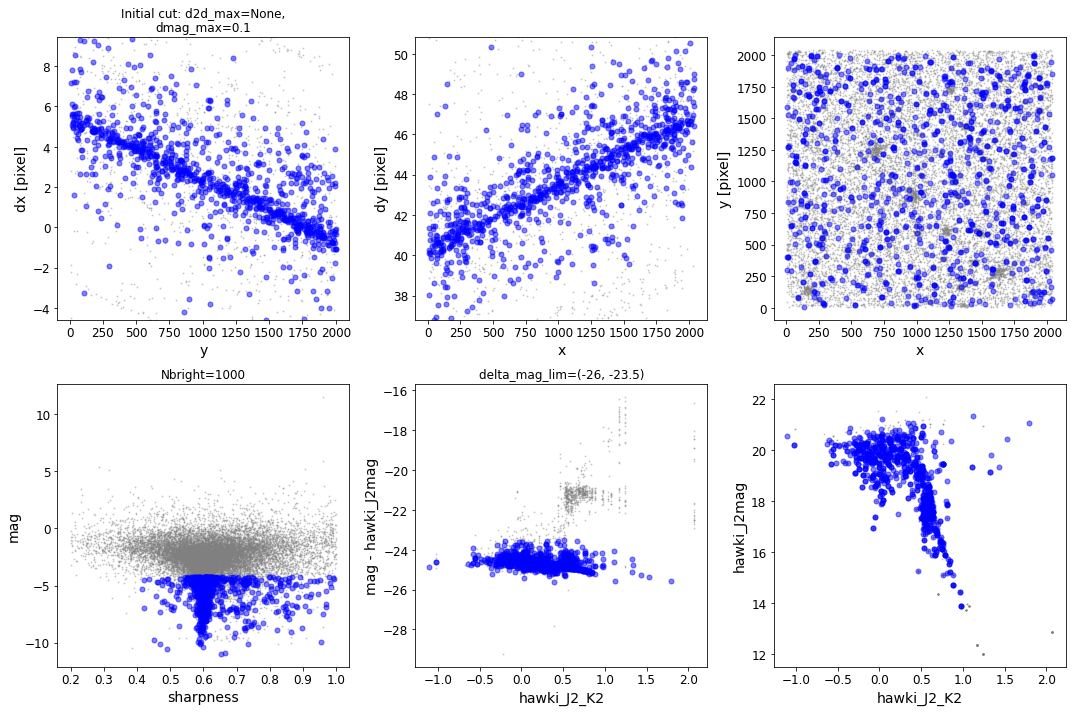

In [6]:
# show the initial dx, dy, centered around their respective medians
# blue symbols: measurements that make the initial cut using d2d_max, dmag_max, Nbright
# small gray symbols: didn't make the initial cut.
# goal of the initial cuts is to remove enough of the faint, spurious matches so that the
# loci of the good matches sticks at least a little out (visually)
if showplots>1:
    sp = initplot(2,3)
    # plot the residuals
    title = f'Initial cut: d2d_max={d2d_max},\ndmag_max={dmag_max}'
    title_Nbright = f'Nbright={Nbright}'
    title_deltamag = f'delta_mag_lim={delta_mag_lim}'
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('y','dx',ax=sp[0],ylim=dx_plotlim,title=title,**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('y','dx',ax=sp[0],ylim=dx_plotlim, ylabel='dx [pixel]',**plot_style['good_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('x','dy',ax=sp[1],ylim=dx_plotlim,**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('x','dy',ax=sp[1],ylim=dy_plotlim,ylabel='dy [pixel]',**plot_style['good_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('x','y',ax=sp[2],**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('x','y',ax=sp[2],ylabel='y [pixel]',**plot_style['good_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('sharpness','mag',ax=sp[3],**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('sharpness','mag',ax=sp[3],title=title_Nbright,ylabel='mag',**plot_style['good_data'])
    if wcs_align.phot.refcat_mainfilter is not None:
        if wcs_align.phot.refcat_maincolor is not None:
            wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot(wcs_align.phot.refcat_maincolor,'delta_mag',ax=sp[4],**plot_style['do_not_use_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot(wcs_align.phot.refcat_maincolor,'delta_mag',title=title_deltamag,ax=sp[4],ylabel=f'mag - {wcs_align.phot.refcat_mainfilter}',**plot_style['good_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot(wcs_align.phot.refcat_maincolor,wcs_align.phot.refcat_mainfilter,ax=sp[5],**plot_style['do_not_use_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot(wcs_align.phot.refcat_maincolor,wcs_align.phot.refcat_mainfilter,ax=sp[5],ylabel=f'{wcs_align.phot.refcat_mainfilter}',**plot_style['good_data'])
            for i in range(6): sp[i].get_legend().remove()
        else:
            wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot(wcs_align.phot.refcat_mainfilter,'delta_mag',title=title_deltamag,ax=sp[4],**plot_style['do_not_use_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot(wcs_align.phot.refcat_mainfilter,'delta_mag',ax=sp[4],ylabel=f'mag - {wcs_align.phot.refcat_mainfilter}',**plot_style['good_data'])
            for i in range(5): sp[i].get_legend().remove()
    else:
        for i in range(4): sp[i].get_legend().remove()

    plt.tight_layout()
    plt.show() 

hello
        slope     intercept        maxval  index  d_bestguess  fwhm  multimax
-4.882812e-03  5.000000e+00  42104.562359    253     1.573287   0.6     False
-4.833984e-03  4.950000e+00  43281.376483    255     2.008377   0.4     False
-4.785156e-03  4.900000e+00  42681.070173    253     1.643467   1.8     False
-4.736328e-03  4.850000e+00  45237.051860    253     1.678557   0.4     False
-4.687500e-03  4.800000e+00  48173.135952    253     1.713648   0.4     False
-4.638672e-03  4.750000e+00  48424.423354    258     2.748738   0.4     False
-4.589844e-03  4.700000e+00  54085.070875    258     2.783828   0.4     False
-4.541016e-03  4.650000e+00  52475.755369    258     2.818919   0.4     False
-4.492188e-03  4.600000e+00  51891.845911    258     2.854009   0.8     False
-4.443359e-03  4.550000e+00  45267.845613    256     2.489099   2.8     False
-4.394531e-03  4.500000e+00  49206.891702    253     1.924189   2.6     False
-4.345703e-03  4.450000e+00  49759.319408    253     1.959


####################
### d_rotated cut
Keeping 594 out of 594, skippin 0 because of null values in columns d_rot_tmp
median: 2.298794
65.000000 percentile cut: max residual for cut: 0.298405
median: 2.293424
i:00 mean:2.293424(0.007646) stdev:0.150029(0.005400) X2norm:1.00 Nchanged:0 Ngood:386 Nclip:208

mean: 2.303043
i:01 mean:2.303043(0.009650) stdev:0.210317(0.006816) X2norm:1.00 Nchanged:90 Ngood:476 Nclip:118

mean: 2.325632
i:02 mean:2.325632(0.011860) stdev:0.278152(0.008379) X2norm:1.00 Nchanged:75 Ngood:551 Nclip:43

mean: 2.313932
i:03 mean:2.313932(0.013432) stdev:0.326273(0.009490) X2norm:1.00 Nchanged:40 Ngood:591 Nclip:3

mean: 2.309744
i:04 mean:2.309744(0.013581) stdev:0.330721(0.009595) X2norm:1.00 Nchanged:3 Ngood:594 Nclip:0

mean: 2.309744
i:05 mean:2.309744(0.013581) stdev:0.330721(0.009595) X2norm:1.00 Nchanged:0 Ngood:594 Nclip:0
i:05 mean:2.309744(0.013581) stdev:0.330721(0.009595) X2norm:1.00 Nchanged:0 Ngood:594 Nclip:0


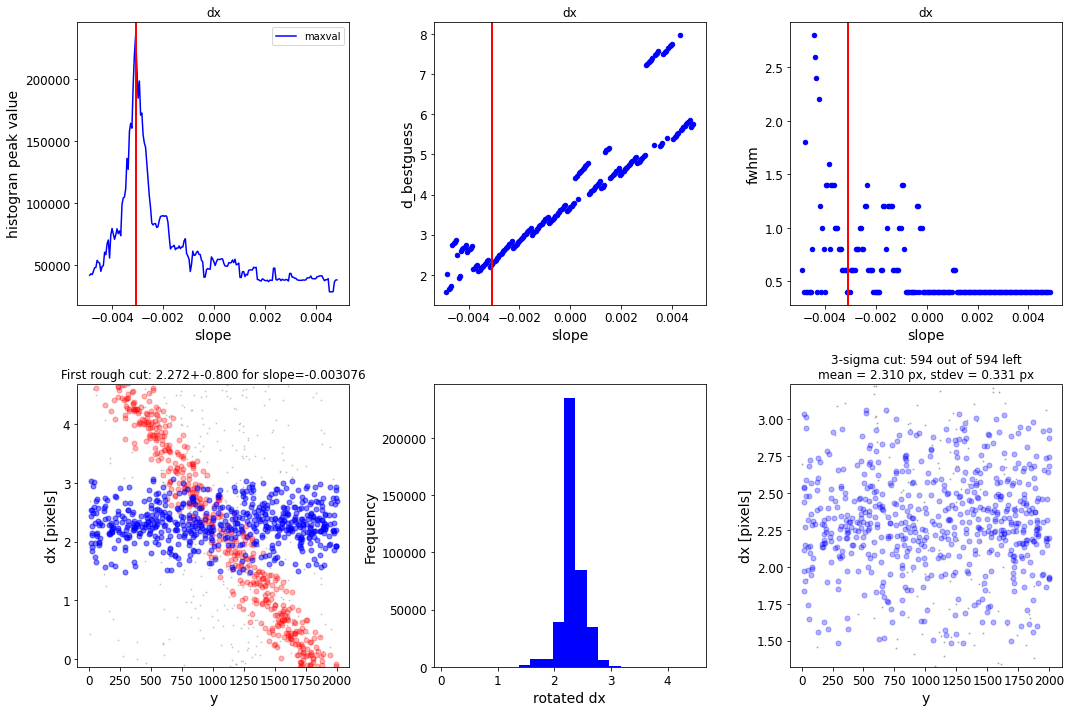

In [7]:
# first, do the dx cut, since dx does not have the same contamination by shadow locii due to 
# the star spikes than dy.
slope_max=-slope_min
slope_stepsize=(slope_max-slope_min)/slope_Nsteps

# initialize dx plot
if showplots>1:
    sp=initplot(2,3)
else:
    sp=None
(dx_rot_results,dx_best_index) = rotate_d_and_find_binmax(wcs_align.phot,ixs,'dx','y',
                                                          Ny,
                                                          binsize=binsize_px,
                                                          bin_weights_flag=bin_weights_flag,
                                                          slope_min=slope_min,
                                                          slope_max=slope_max,
                                                          slope_stepsize=slope_stepsize,
                                                          showplots=showplots,
                                                          sp=sp,
                                                          spi=[0,1,2])


# Using the best dx_rotated, we first remove all entries with dx_rotated outside of dx_bestguess+-Nfwhm*fwhm
# Note that FWHM ~ 2.355 stdev, so Nfwhm*fwhm should be at least 3*stdev. This is the first ROUGH cut, with 
# which we just want to remove excessive amounts of outliers. Then a 3-sigma cut is done on the *rotated* dx
(ixs_dx_cut,ixs_dx_roughcut) = sigmacut_d_rot(wcs_align.phot,ixs,'dx','y',
                                              dx_rot_results.t.loc[dx_best_index,'slope'],
                                              dx_rot_results.t.loc[dx_best_index,'intercept'],
                                              dx_rot_results.t.loc[dx_best_index,'d_bestguess'],
                                              rough_cut_px = Nfwhm*dx_rot_results.t.loc[dx_best_index,'fwhm'],
                                              binsize=binsize_px,
                                              bin_weights_flag=bin_weights_flag,
                                              showplots=showplots,
                                              sp=sp,
                                              spi=[3,4,5]
                                              )
plt.tight_layout()        

# top plots: histogram peak value, best guess of rotated dx offset, and fwhm with respect to the slopes.
# The red line indicates the best slope
# bottom plots:
# first rough cut is best guess of rotated dx offset +- Nfwhm*fwhm
# bottom left: red is dx, blue is the best rotated dx. small gray circles did not make initial cut
# bottom middle: histogram of rotated dx: this peak value should be the same as the peak in top left plot
# bottom right: 3-sigma cut getting rid of outliers still in the rough cut

hello
   slope  intercept        maxval  index  d_bestguess  fwhm  multimax
0.002588      -2.65  72883.478043     27    44.039981   1.2     False
0.002637      -2.70  71437.493643     27    44.080594   1.2     False
0.002686      -2.75  79001.831818     26    43.921206   1.2     False
0.002734      -2.80  88390.594691     26    43.961818   1.0     False
0.002783      -2.85  76281.093517     23    43.379131   1.0     False
0.002832      -2.90  88492.879935     25    43.755765   1.0     False
0.002881      -2.95  98611.634831     25    43.732399   1.0     False
0.002930      -3.00 108930.981705     24    43.509034   0.8     False
0.002979      -3.05 118952.423183     24    43.485668   0.8     False
0.003027      -3.10 118241.809039     24    43.462302   0.8     False
0.003076      -3.15 118820.518421     25    43.638936   0.8     False
0.003125      -3.20 148883.378763     25    43.615570   0.6     False
0.003174      -3.25 156592.676383     25    43.592205   0.6     False
0.003223      

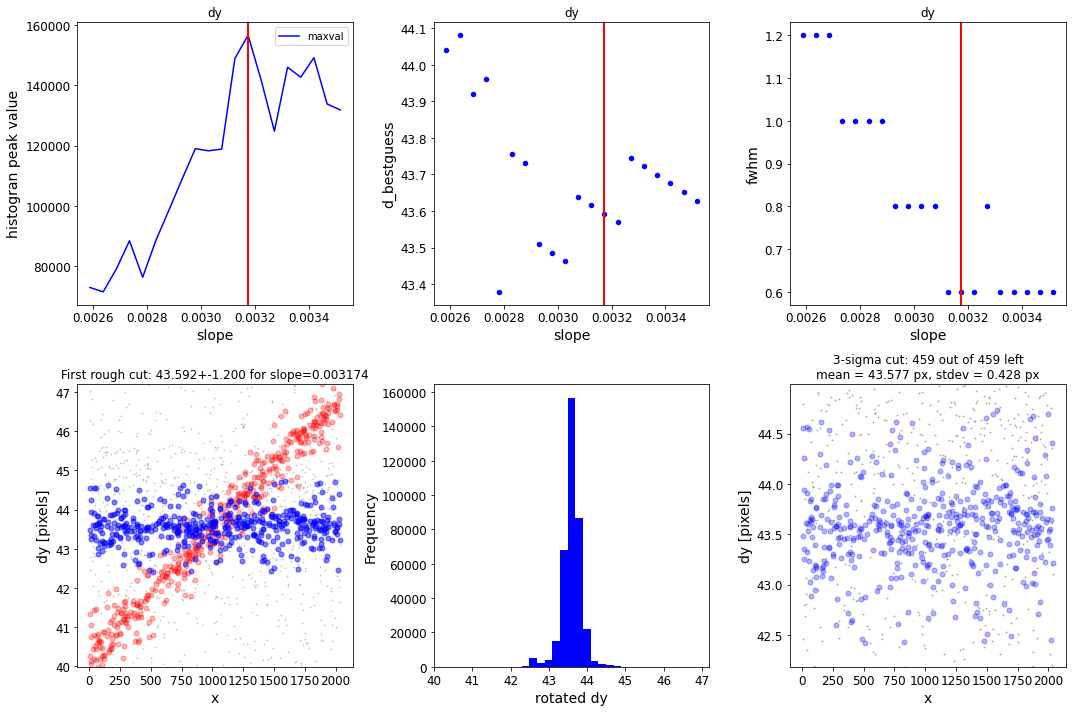

In [8]:
# Using the indices after the dx cut, we now also do a dy cut
# slope in dy is the -slope of dx.
slope = -dx_rot_results.t.loc[dx_best_index,'slope']
# We only need to do it +-10*stepsize
slope_min = slope-10*slope_stepsize
slope_max = slope+10*slope_stepsize

# initialize dy plot
if showplots>1:
    sp=initplot(2,3)
else:
    sp=None
(dy_rot_results,dy_best_index) = rotate_d_and_find_binmax(wcs_align.phot,ixs_dx_cut,'dy','x',
                                                          Nx,
                                                          binsize=binsize_px,
                                                          bin_weights_flag=bin_weights_flag,
                                                          slope_min=slope_min,
                                                          slope_max=slope_max,
                                                          slope_stepsize=slope_stepsize,
                                                          showplots=showplots,
                                                          sp=sp,
                                                          spi=[0,1,2])
(ixs_dy_cut,ixs_dy_roughcut) = sigmacut_d_rot(wcs_align.phot,ixs_dx_cut,'dy','x',
                                              dy_rot_results.t.loc[dy_best_index,'slope'],
                                              dy_rot_results.t.loc[dy_best_index,'intercept'],
                                              dy_rot_results.t.loc[dy_best_index,'d_bestguess'],
                                              rough_cut_px = Nfwhm*dy_rot_results.t.loc[dy_best_index,'fwhm'],
                                              binsize=binsize_px,
                                              bin_weights_flag=bin_weights_flag,
                                              showplots=showplots,
                                              sp=sp,
                                              spi=[3,4,5]
                                              )
plt.tight_layout()        


In [9]:

if savephottable:
    print(f'Saving {outbasename}.good.phot.txt')
    wcs_align.phot.write(f'{outbasename}.good.phot.txt',indices=ixs_dy_cut)
    if savephottable>1:
        print(f'Saving {outbasename}.all.phot.txt')
        wcs_align.phot.write(f'{outbasename}.all.phot.txt')

#if showplots>1:
#    # get the bad data points
#    infoplots(wcs_align.phot,ixs_dy_cut,dy_plotlim=dy_plotlim,dx_plotlim=dx_plotlim)
            



Saving /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.good.phot.txt
Saving /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_assignwcsstep.all.phot.txt


In [10]:
# Now align to the reference catalog ONLY using the best matches after the dy cut
# This alignment is done using a hacked version of tweakreg by Justin Pierel: only the part of tweakreg
# is used that does the rshift (rotation+translation) FITTING (only the fitting, no matching! 
# It uses the matches from wcs_align.phot.t[ixs_bestmatch])
ixs_bestmatch = ixs_dy_cut
(runflag,tweakregfilename) = wcs_align.run_align2refcat(calimname,ixs=ixs_bestmatch,
                                                   overwrite=overwrite,skip_if_exists=skip_if_exists)
print('DONE!')


2022-06-28 21:02:56,172 - stpipe.TweakRegStep - INFO - TweakRegStep instance created.


/Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_tweakregstep.fits
Setting output directory for tweakregstep.fits file to /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats
459 matches are passed to tweakreg rshift fitting
Fitting tweakreg fitgeometry=rshift to xy=x,y to ra,dec=hawki_ra,hawki_dec


2022-06-28 21:02:56,510 - stpipe.TweakRegStep - INFO - Step TweakRegStep running with args ([<ImageModel(2048, 2048) from jw01074003001_04101_00002_nrcb3_assignwcsstep.fits>],).
2022-06-28 21:02:56,513 - stpipe.TweakRegStep - INFO - Step TweakRegStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': '/Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats', 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 50, 'brightest': 1000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 10, 'searchrad': 0.5, 'use2dhist': True, 'separation': 9, 'tolerance': 0.7, 'xoffset': 0, 'yoffset': 0, 'fitgeometry': 'rshift', 'nclip': 3, 'sigma': 3.0, 'align_to_gaia': False, 'gaia_catalog': 'GAIADR2', 'min_gaia': 30, 'save

DONE!


hello
Index(['aper_sum_4.6px', 'annulus_median_4.6px', 'aper_bkg_4.6px',
       'aper_sum_bkgsub_4.6px', 'flux_err_4.6px', 'mag', 'dmag', 'x', 'y',
       'sharpness', 'roundness1', 'roundness2', 'ra', 'dec', 'x_idl', 'y_idl',
       'hawki_ra', 'hawki_dec', 'hawki_x', 'hawki_y', 'hawki_ID',
       'hawki_ra_error_mas', 'hawki_dec_error_mas', 'hawki_J2mag',
       'hawki_K2mag', 'hawki_J2_K2', 'hawki_d2d', 'dx', 'dy', 'delta_mag',
       '__weights', 'd_rot_tmp', '__tmp_residuals'],
      dtype='object')
Saving /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_tweakregstep.phot.prewcs.png
Saving /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_tweakregstep.good.phot.txt
hello
Index(['aper_sum_4.6px', 'annulus_median_4.6px', 'aper_bkg_4.6px',
       'aper_sum_bkgsub_4.6px', 'flux_err_4.6px', 'mag', 'dmag', 'x', 'y',
       'sharpness', 'roundness1', 'roundness2', 'ra', 'dec', 'x_idl', 

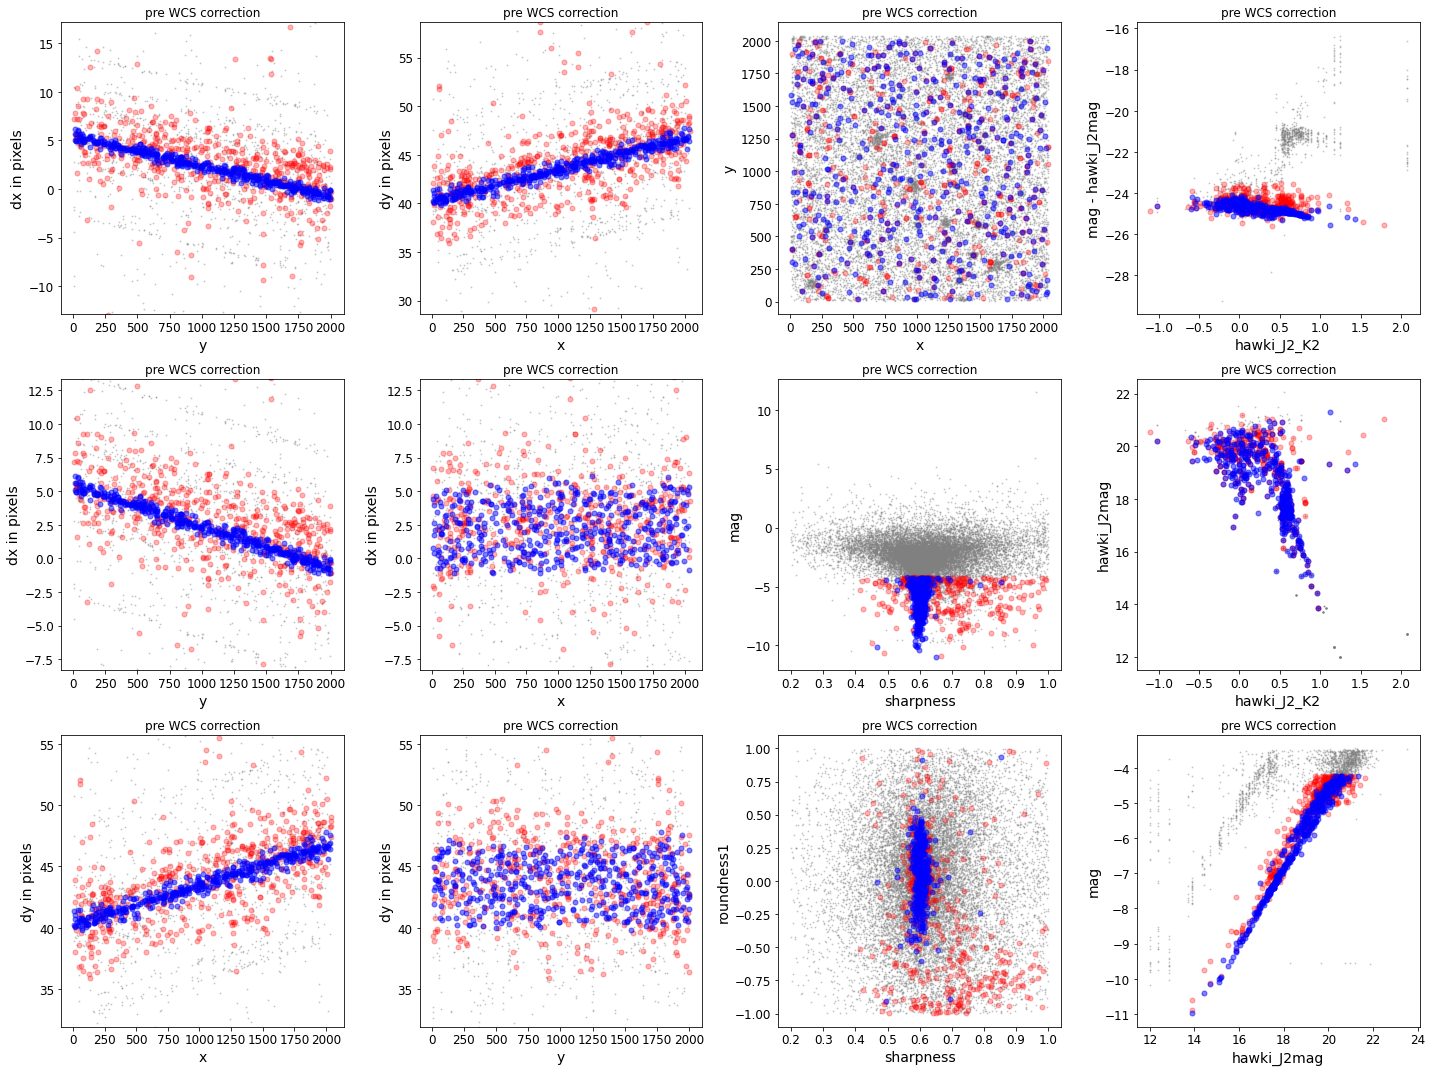

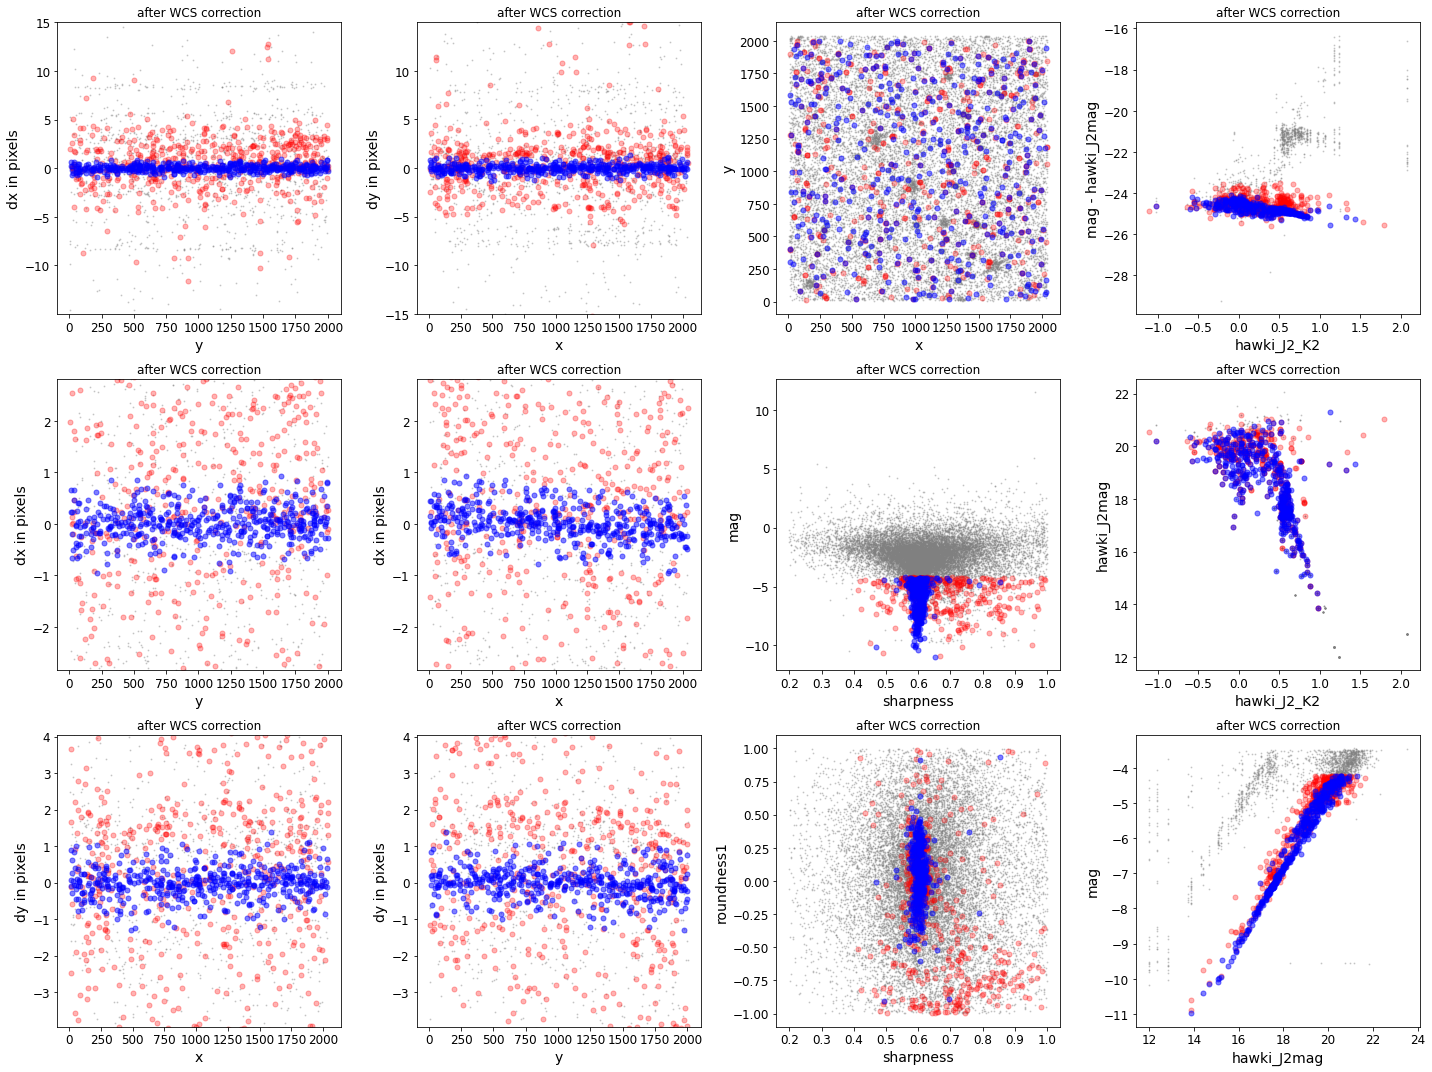

In [11]:

wcs_align.update_phottable_final_wcs(tweakregfilename,
                                ixs_bestmatch = ixs_bestmatch,
                                showplots=showplots,
                                saveplots=saveplots,
                                savephottable=savephottable,
                                overwrite=overwrite
                                )


In [12]:
import copy
bkp = copy.deepcopy(wcs_align)

In [13]:
wcs_align = copy.deepcopy(bkp)
print(wcs_align.phot.t.columns,wcs_align.phot.refcatshort)
for col in wcs_align.phot.t.columns:
    if re.search(f'^{wcs_align.phot.refcatshort}',col) is not None:
        wcs_align.phot.t.drop(columns=[col],inplace=True)
        print(col)
    if re.search(f'^_',col) is not None:
        wcs_align.phot.t.drop(columns=[col],inplace=True)
        print(col)
for col in ['ra','dec','dx','dy','d_rot_tmp','delta_mag']:
    if col in wcs_align.phot.t.columns:
        wcs_align.phot.t.drop(columns=[col],inplace=True)
   
print('Done!')
print(wcs_align.phot.t.columns,wcs_align.phot.refcatshort)


Index(['aper_sum_4.6px', 'annulus_median_4.6px', 'aper_bkg_4.6px',
       'aper_sum_bkgsub_4.6px', 'flux_err_4.6px', 'mag', 'dmag', 'x', 'y',
       'sharpness', 'roundness1', 'roundness2', 'ra', 'dec', 'x_idl', 'y_idl',
       'hawki_ra', 'hawki_dec', 'hawki_ID', 'hawki_ra_error_mas',
       'hawki_dec_error_mas', 'hawki_J2mag', 'hawki_K2mag', 'hawki_J2_K2',
       'delta_mag', '__weights', 'd_rot_tmp', '__tmp_residuals', 'hawki_x',
       'hawki_y', 'dx', 'dy'],
      dtype='object') hawki
hawki_ra
hawki_dec
hawki_ID
hawki_ra_error_mas
hawki_dec_error_mas
hawki_J2mag
hawki_K2mag
hawki_J2_K2
__weights
__tmp_residuals
hawki_x
hawki_y
Done!
Index(['aper_sum_4.6px', 'annulus_median_4.6px', 'aper_bkg_4.6px',
       'aper_sum_bkgsub_4.6px', 'flux_err_4.6px', 'mag', 'dmag', 'x', 'y',
       'sharpness', 'roundness1', 'roundness2', 'x_idl', 'y_idl'],
      dtype='object') hawki


In [15]:
print(tweakregfilename)
wcs_align.phot.run_phot(tweakregfilename,do_photometry_flag=False,
                 photcat_loaded = True,rematch_refcat=True,refcatname='hawki')

/Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_tweakregstep.fits

### Doing photometry on /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_tweakregstep.fits
NO photometry catalog filename
Filename: /Users/arest/nircam/jwst_distortions_tools/wcs_align/test_newrefcats/jw01074003001_04101_00002_nrcb3_tweakregstep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     351   ()      
  1  SCI           1 ImageHDU       112   (2048, 2048)   float32   
  2  ERR           1 ImageHDU        10   (2048, 2048)   float32   
  3  DQ            1 ImageHDU        11   (2048, 2048)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 2048)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2048, 2048)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2048, 2048)   float32   
  7  VAR_FLAT      1 ImageHDU       

########### !!!!!!!!!! SHARPNESS =(0.4, 1.0)CUT!!!
########### !!!!!!!!!! delta_mag_lim=(-26, -22) CUT!!!
# of matched objects that pass initial cuts: 1000
Nx:2048 Ny:2048
dx median: 0.08544285285267961
dy median: 0.029987463860322805
hello


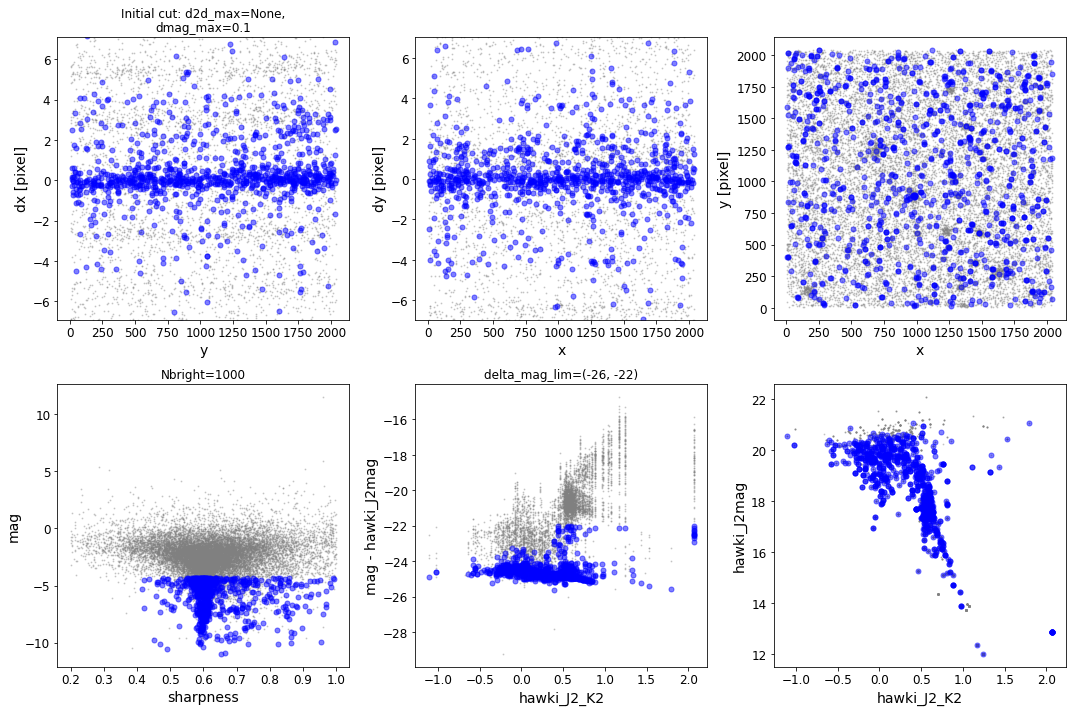

In [16]:
# Now we find good refcat matches. This is 
# done in jwst_wcs_align.find_good_refcat_matches(), but 
# we will do it below step by step, since this is the most
# important step in this process

# here are a few more fine-tuning parameters

# The y-axes limits of the first plots are the mean of dx/dy +-plots_dxdy_delta_pix_ylim
plots_dxdy_delta_pix_ylim=7

# histo parameters
binsize_px = 0.2 # this is the binsize of the dx/dy histograms. 
                 # A good value is 0.1, which should be on the order 
                 # of the expected stdev of dx if things are good
bin_weights_flag=True # If bin_weights_flag is set to True, 
                      # then the dx/dy bins are weighted by 
                      # the flux of the detection. This enhances 
                      # the signal in the histogram since real 
                      # matches in general have more flux than spurious matches

# dx/dy are corrected by a linear function with a slope (i.e., the effect a rotation would have on it), and 
# then a histogram of this "rotated" dx/dy is done, and the peak of that
# histogram is determined. This is done for a set of slopes, which is defined
# with slope_min, slope_Nsteps, and then 
# slope_max=-slope_min, slope_stepsize=(slope_max-slope_min)/slope_Nsteps
# slope=-10.0/2048.0 would correspond to the slope of a linear function for wich dx changes by 
# 10 pixels of the full detector size of 2048 pixels
slope_min=-10.0/2048.0 
slope_Nsteps = 200 # slope_max=-slope_min, slope_stepsize=(slope_max-slope_min)/slope_Nsteps
Nfwhm = 2

# basename for output files, e.g., plots
outbasename = re.sub('\.fits$','',calimname)
if (outbasename == calimname): raise RuntimeError(f'Could not remove .fits from {calimname}')        

# use all the data in the photometric catalog if ixs=None
ixs=None

if (saveplots or savephottable) and (outbasename is None):
    raise RuntimeError('Trying to save plots and/or phot tables, but outbasename is None!')

Nx = wcs_align.phot.scihdr['NAXIS1']
Ny = wcs_align.phot.scihdr['NAXIS2']

refcat_xcol = wcs_align.phot.refcat_xcol
refcat_ycol = wcs_align.phot.refcat_ycol
xcol='x'
ycol='y'

# Calculate dx and dy
wcs_align.phot.t['dx'] = wcs_align.phot.t[refcat_xcol] - wcs_align.phot.t[xcol]
wcs_align.phot.t['dy'] = wcs_align.phot.t[refcat_ycol] - wcs_align.phot.t[ycol]
# Calculate the difference between JWST mag and main filter of reference catalog
if wcs_align.phot.refcat_mainfilter is not None:
    wcs_align.phot.t['delta_mag'] = wcs_align.phot.t['mag'] - wcs_align.phot.t[wcs_align.phot.refcat_mainfilter]

sharpness_lim = (0.4,1.0)
delta_mag_lim=(-26, -22)
# do some first very rough cuts.
# sets phot.ixs_use and phot.ixs_notuse
# returns phot.ixs_use
ixs = wcs_align.initial_cut(phot=wcs_align.phot,
                       d2d_max=d2d_max,
                       dmag_max=dmag_max,
                       Nbright=Nbright,
                       sharpness_lim=sharpness_lim,
                       delta_mag_lim=delta_mag_lim,
                       ixs=ixs)

dx_median = wcs_align.phot.t.loc[ixs,'dx'].median()
dy_median = wcs_align.phot.t.loc[ixs,'dy'].median()

if wcs_align.verbose>1: print(f'Nx:{Nx} Ny:{Ny}\ndx median: {dx_median}\ndy median: {dy_median}')

# these are the general limits for the y-axis for the dx/dy plots
dy_plotlim = (dy_median-plots_dxdy_delta_pix_ylim,dy_median+plots_dxdy_delta_pix_ylim)
dx_plotlim = (dx_median-plots_dxdy_delta_pix_ylim,dx_median+plots_dxdy_delta_pix_ylim)

plot_style={}
plot_style['good_data']={'style':'o','color':'blue', 'ms':5 ,'alpha':0.5}
plot_style['cut_data']={'style':'o','color':'red', 'ms':5 ,'alpha':0.3}
plot_style['do_not_use_data']={'style':'o','color':'gray', 'ms':1 ,'alpha':0.3}
# show the initial dx, dy, centered around their respective medians
# blue symbols: measurements that make the initial cut using d2d_max, dmag_max, Nbright
# small gray symbols: didn't make the initial cut.
# goal of the initial cuts is to remove enough of the faint, spurious matches so that the
# loci of the good matches sticks at least a little out (visually)
if showplots>1:
    sp = initplot(2,3)
    # plot the residuals
    title = f'Initial cut: d2d_max={d2d_max},\ndmag_max={dmag_max}'
    title_Nbright = f'Nbright={Nbright}'
    title_deltamag = f'delta_mag_lim={delta_mag_lim}'
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('y','dx',ax=sp[0],ylim=dx_plotlim,title=title,**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('y','dx',ax=sp[0],ylim=dx_plotlim, ylabel='dx [pixel]',**plot_style['good_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('x','dy',ax=sp[1],ylim=dx_plotlim,**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('x','dy',ax=sp[1],ylim=dy_plotlim,ylabel='dy [pixel]',**plot_style['good_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('x','y',ax=sp[2],**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('x','y',ax=sp[2],ylabel='y [pixel]',**plot_style['good_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot('sharpness','mag',ax=sp[3],**plot_style['do_not_use_data'])
    wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot('sharpness','mag',ax=sp[3],title=title_Nbright,ylabel='mag',**plot_style['good_data'])
    if wcs_align.phot.refcat_mainfilter is not None:
        if wcs_align.phot.refcat_maincolor is not None:
            wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot(wcs_align.phot.refcat_maincolor,'delta_mag',ax=sp[4],**plot_style['do_not_use_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot(wcs_align.phot.refcat_maincolor,'delta_mag',title=title_deltamag,ax=sp[4],ylabel=f'mag - {wcs_align.phot.refcat_mainfilter}',**plot_style['good_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot(wcs_align.phot.refcat_maincolor,wcs_align.phot.refcat_mainfilter,ax=sp[5],**plot_style['do_not_use_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot(wcs_align.phot.refcat_maincolor,wcs_align.phot.refcat_mainfilter,ax=sp[5],ylabel=f'{wcs_align.phot.refcat_mainfilter}',**plot_style['good_data'])
            for i in range(6): sp[i].get_legend().remove()
        else:
            wcs_align.phot.t.loc[wcs_align.phot.ixs_notuse].plot(wcs_align.phot.refcat_mainfilter,'delta_mag',title=title_deltamag,ax=sp[4],**plot_style['do_not_use_data'])
            wcs_align.phot.t.loc[wcs_align.phot.ixs_use].plot(wcs_align.phot.refcat_mainfilter,'delta_mag',ax=sp[4],ylabel=f'mag - {wcs_align.phot.refcat_mainfilter}',**plot_style['good_data'])
            for i in range(5): sp[i].get_legend().remove()
    else:
        for i in range(4): sp[i].get_legend().remove()

    plt.tight_layout()
    plt.show() 